<a href="https://colab.research.google.com/github/Ayesha-Feroz/Ayesha-Feroz/blob/main/FDR%20estimation%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

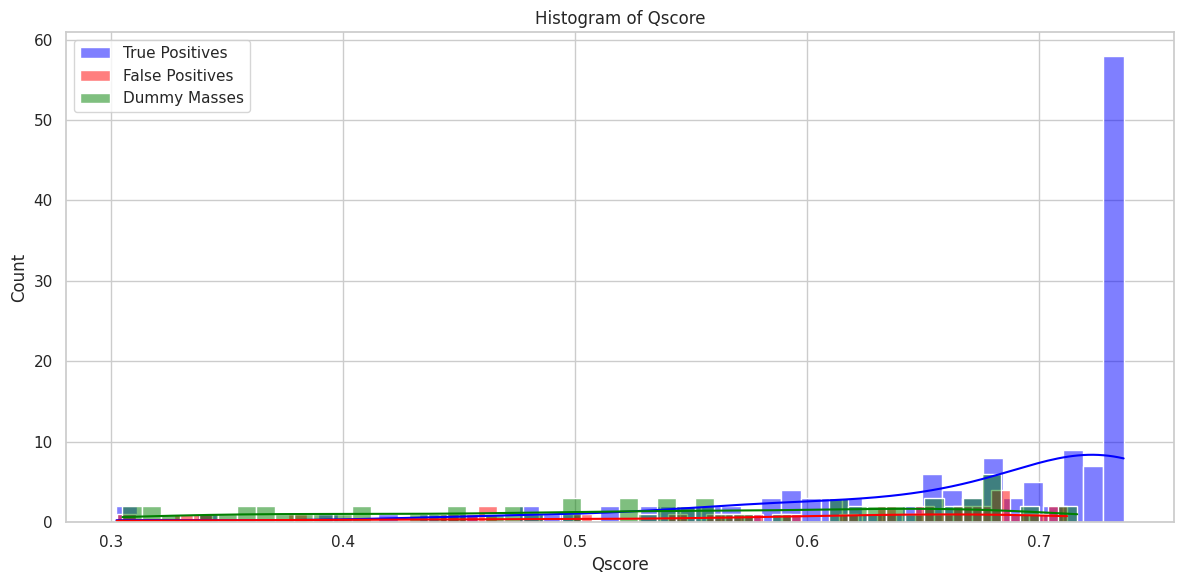

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the deconvolved CSV file
deconvolved_df = pd.read_csv('/content/Test2_deconvolved_corected.csv')  # Replace with the path to your deconvolved CSV file

# Load the true masses CSV file
true_masses_df = pd.read_csv('/content/massestest2.csv')  # Replace with the path to your true masses CSV file

# Define ppm tolerance
ppm_tolerance = 10  # Adjust as needed

# Filter deconvolved_df for rows where TargetDummyType is 0
filtered_deconvolved_df = deconvolved_df[deconvolved_df['TargetDummyType'] == 0]

# Initialize empty lists for true positives, false positives, and dummy masses
true_positives = []
false_positives = []
dummy_masses = []

# Iterate through rows in filtered_deconvolved_df
for index, row in filtered_deconvolved_df.iterrows():
    # Calculate ppm difference between each MonoisotopicMass in filtered_deconvolved_df
    # and true_masses_df and check if it's within ppm_tolerance
    ppm_diff = abs(row['MonoisotopicMass'] - true_masses_df['NeutralMass']) / true_masses_df['NeutralMass'] * 1e6
    matches_within_tolerance = any(ppm_diff <= ppm_tolerance)

    # Classify the rows based on matching criteria
    if matches_within_tolerance:
        true_positives.append(row)
    else:
        false_positives.append(row)

# Filter the deconvolved_df for rows where TargetDummyType is greater than 0
dummy_masses_df = deconvolved_df[deconvolved_df['TargetDummyType'] > 0]

# Convert true_positives and false_positives to dataframes
true_positives_df = pd.DataFrame(true_positives)
false_positives_df = pd.DataFrame(false_positives)

# Create histograms and density plots based on Qscore
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot histograms and density plots for True Positives, False Positives, and Dummy Masses
sns.histplot(data=true_positives_df, x='Qscore', label='True Positives', kde=True, color='blue',bins=50)
sns.histplot(data=false_positives_df, x='Qscore', label='False Positives', kde=True, color='red',bins=50)
sns.histplot(data=dummy_masses_df, x='Qscore', label='Dummy Masses', kde=True, color='green',bins=50)
plt.xlabel('Qscore')
plt.title('Histogram of Qscore')
plt.legend()

plt.tight_layout()
plt.show()



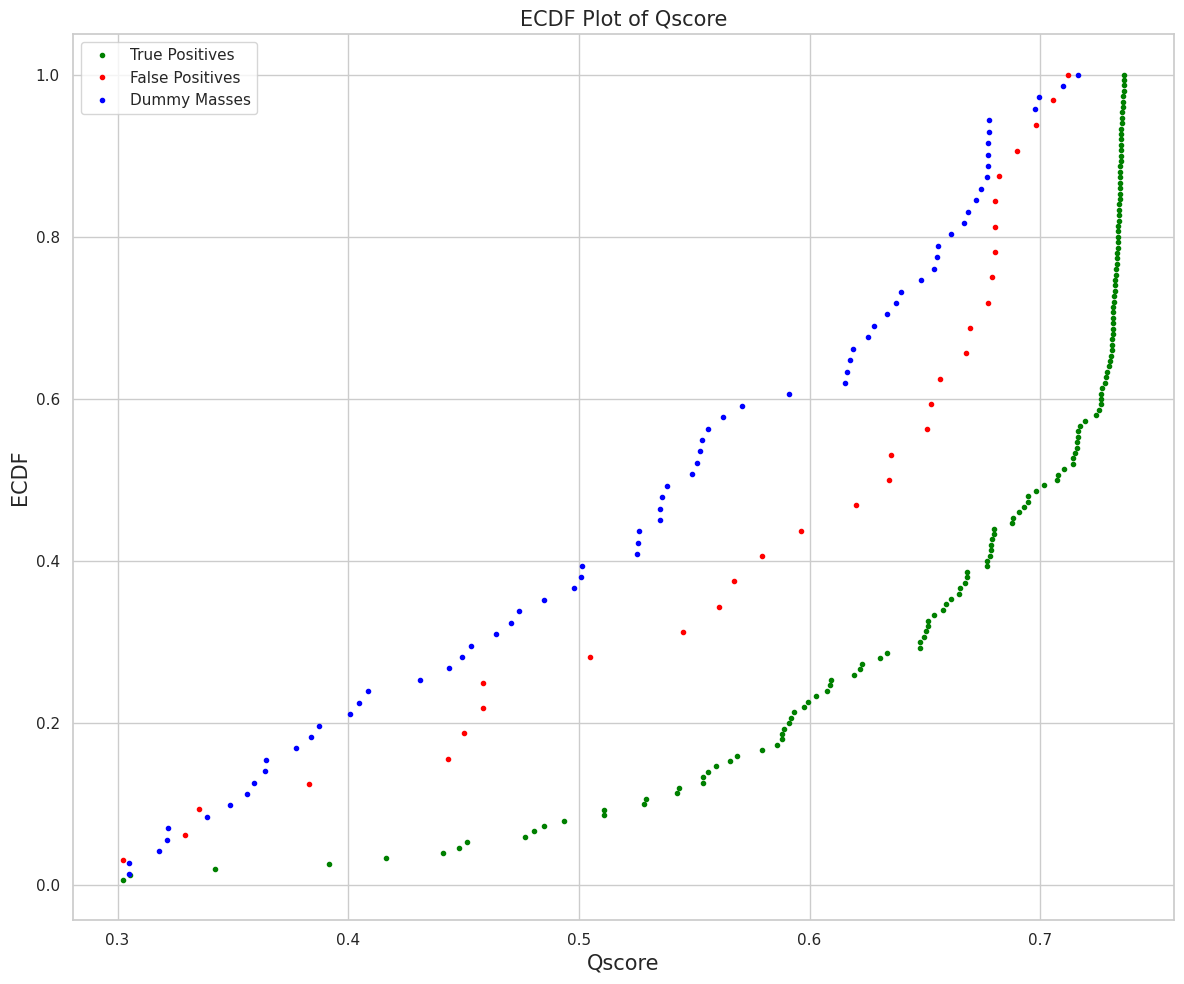

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the deconvolved CSV file
deconvolved_df = pd.read_csv('/content/Test2_deconvolved_corected.csv')  # Replace with the path to your deconvolved CSV file

# Load the true masses CSV file
true_masses_df = pd.read_csv('/content/massestest2.csv')  # Replace with the path to your true masses CSV file

# Define ppm tolerance
ppm_tolerance = 10  # Adjust as needed

# Filter deconvolved_df for rows where TargetDummyType is 0
filtered_deconvolved_df = deconvolved_df[deconvolved_df['TargetDummyType'] == 0]

# Initialize empty lists for true positives, false positives, and dummy masses
true_positives = []
false_positives = []
dummy_masses = []

# Iterate through rows in filtered_deconvolved_df
for index, row in filtered_deconvolved_df.iterrows():
    # Calculate ppm difference between each MonoisotopicMass in filtered_deconvolved_df
    # and true_masses_df and check if it's within ppm_tolerance
    ppm_diff = abs(row['MonoisotopicMass'] - true_masses_df['NeutralMass']) / true_masses_df['NeutralMass'] * 1e6
    matches_within_tolerance = any(ppm_diff <= ppm_tolerance)

    # Classify the rows based on matching criteria
    if matches_within_tolerance:
        true_positives.append(row)
    else:
        false_positives.append(row)

# Filter the deconvolved_df for rows where TargetDummyType is greater than 0
dummy_masses_df = deconvolved_df[deconvolved_df['TargetDummyType'] > 0]

# Convert true_positives and false_positives to dataframes
true_positives_df = pd.DataFrame(true_positives)
false_positives_df = pd.DataFrame(false_positives)

# Create ECDF plots based on Qscore
plt.figure(figsize=(12, 10))

# Function to calculate ECDF
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# Create ECDF plots for True Positives, False Positives, and Dummy Masses
for data, label, color in [(true_positives_df['Qscore'], 'True Positives', 'green'),
                           (false_positives_df['Qscore'], 'False Positives', 'red'),
                           (dummy_masses_df['Qscore'], 'Dummy Masses', 'blue')]:
    x, y = ecdf(data)
    plt.plot(x, y, marker='.', linestyle='none', label=label, color=color)

plt.xlabel('Qscore', fontsize=15)
plt.ylabel('ECDF', fontsize=15)
plt.title('ECDF Plot of Qscore', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# New section

# New section

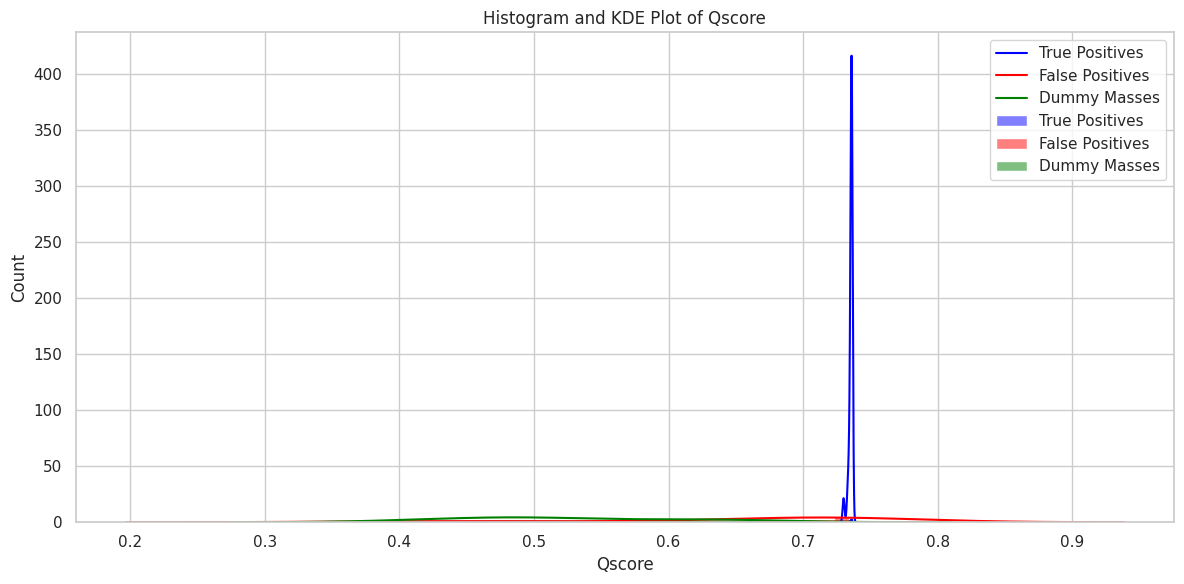

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the deconvolved CSV file
deconvolved_df = pd.read_csv('/content/Test1_deconvolved.csv')  # Replace with the path to your deconvolved CSV file

# Load the true masses CSV file
true_masses_df = pd.read_csv('/content/massestest1.ayesha.csv')  # Replace with the path to your true masses CSV file

# Define ppm tolerance
ppm_tolerance = 10  # Adjust as needed

# Filter deconvolved_df for rows where TargetDummyType is 0
filtered_deconvolved_df = deconvolved_df[deconvolved_df['TargetDummyType'] == 0]

# Initialize empty lists for true positives, false positives, and dummy masses
true_positives = []
false_positives = []
dummy_masses = []

# Iterate through rows in filtered_deconvolved_df
for index, row in filtered_deconvolved_df.iterrows():
    # Calculate ppm difference between each MonoisotopicMass in filtered_deconvolved_df
    # and true_masses_df and check if it's within ppm_tolerance
    ppm_diff = abs(row['MonoisotopicMass'] - true_masses_df['NeutralMass']) / true_masses_df['NeutralMass'] * 1e6
    matches_within_tolerance = any(ppm_diff <= ppm_tolerance)

    # Classify the rows based on matching criteria
    if matches_within_tolerance:
        true_positives.append(row)
    else:
        false_positives.append(row)

# Filter the deconvolved_df for rows where TargetDummyType is greater than 0
dummy_masses_df = deconvolved_df[deconvolved_df['TargetDummyType'] > 0]

# Convert true_positives and false_positives to dataframes
true_positives_df = pd.DataFrame(true_positives)
false_positives_df = pd.DataFrame(false_positives)

# Create histograms and density plots based on Qscore with increased bin size
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot histograms for True Positives, False Positives, and Dummy Masses
sns.histplot(data=true_positives_df, x='Qscore', label='True Positives', kde=True, color='blue', bins=30)  # Adjust bins
sns.histplot(data=false_positives_df, x='Qscore', label='False Positives', kde=True, color='red', bins=30)  # Adjust bins
sns.histplot(data=dummy_masses_df, x='Qscore', label='Dummy Masses', kde=True, color='green', bins=30)  # Adjust bins

# Plot KDE for True Positives, False Positives, and Dummy Masses
sns.kdeplot(data=true_positives_df, x='Qscore', label='True Positives', color='blue')
sns.kdeplot(data=false_positives_df, x='Qscore', label='False Positives', color='red')
sns.kdeplot(data=dummy_masses_df, x='Qscore', label='Dummy Masses', color='green')

plt.xlabel('Qscore')
plt.title('Histogram and KDE Plot of Qscore')
plt.legend()

plt.tight_layout()
plt.show()


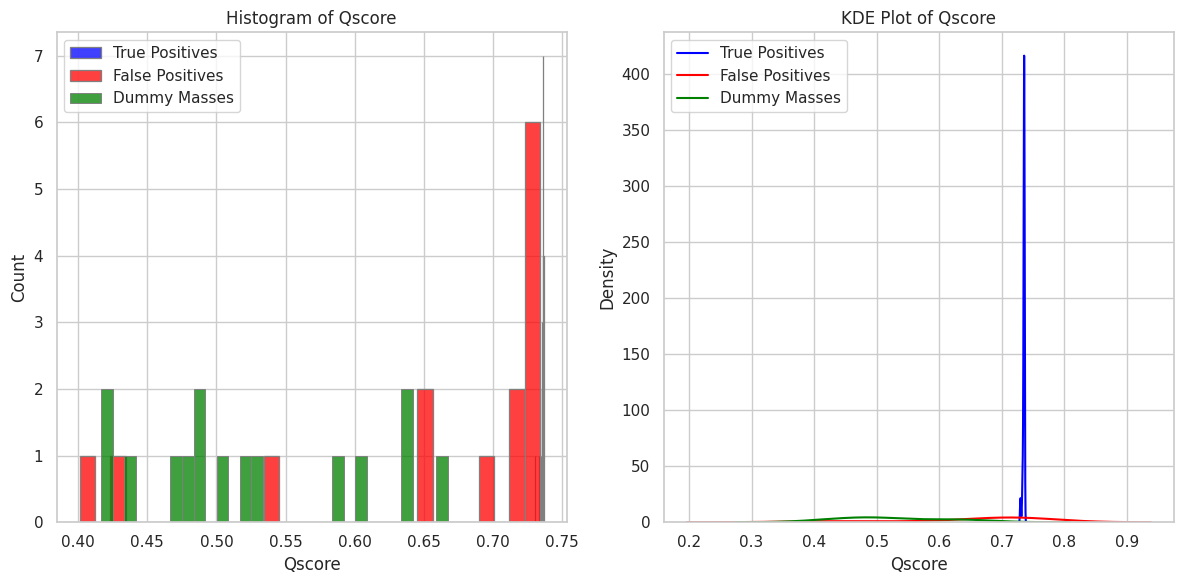

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the deconvolved CSV file
deconvolved_df = pd.read_csv('/content/Test1_deconvolved.csv')  # Replace with the path to your deconvolved CSV file

# Load the true masses CSV file
true_masses_df = pd.read_csv('/content/massestest1.ayesha.csv')  # Replace with the path to your true masses CSV file

# Define ppm tolerance
ppm_tolerance = 10  # Adjust as needed

# Filter deconvolved_df for rows where TargetDummyType is 0
filtered_deconvolved_df = deconvolved_df[deconvolved_df['TargetDummyType'] == 0]

# Initialize empty lists for true positives, false positives, and dummy masses
true_positives = []
false_positives = []
dummy_masses = []

# Iterate through rows in filtered_deconvolved_df
for index, row in filtered_deconvolved_df.iterrows():
    # Calculate ppm difference between each MonoisotopicMass in filtered_deconvolved_df
    # and true_masses_df and check if it's within ppm_tolerance
    ppm_diff = abs(row['MonoisotopicMass'] - true_masses_df['NeutralMass']) / true_masses_df['NeutralMass'] * 1e6
    matches_within_tolerance = any(ppm_diff <= ppm_tolerance)

    # Classify the rows based on matching criteria
    if matches_within_tolerance:
        true_positives.append(row)
    else:
        false_positives.append(row)

# Filter the deconvolved_df for rows where TargetDummyType is greater than 0
dummy_masses_df = deconvolved_df[deconvolved_df['TargetDummyType'] > 0]

# Convert true_positives and false_positives to dataframes
true_positives_df = pd.DataFrame(true_positives)
false_positives_df = pd.DataFrame(false_positives)

# Create separate KDE and histogram plots for Qscore
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot histograms for True Positives, False Positives, and Dummy Masses
plt.subplot(1, 2, 1)
sns.histplot(data=true_positives_df, x='Qscore', label='True Positives', kde=False, color='blue', bins=30,edgecolor='grey')  # Adjust bins
sns.histplot(data=false_positives_df, x='Qscore', label='False Positives', kde=False, color='red', bins=30, edgecolor='grey')  # Adjust bins
sns.histplot(data=dummy_masses_df, x='Qscore', label='Dummy Masses', kde=False, color='green', bins=30, edgecolor='grey')  # Adjust bins
plt.xlabel('Qscore')
plt.title('Histogram of Qscore')
plt.legend()

# Plot KDE plots for True Positives, False Positives, and Dummy Masses
plt.subplot(1, 2, 2)
sns.kdeplot(data=true_positives_df, x='Qscore', label='True Positives', color='blue')
sns.kdeplot(data=false_positives_df, x='Qscore', label='False Positives', color='red')
sns.kdeplot(data=dummy_masses_df, x='Qscore', label='Dummy Masses', color='green')
plt.xlabel('Qscore')
plt.title('KDE Plot of Qscore')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Script to convert tsv file to csv
